In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

C:\anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris

In [3]:
#키
print(iris_dataset().keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
#데이터셋 설명
print(iris_dataset()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#타깃 이름
print(iris_dataset()['target_names'])

['setosa' 'versicolor' 'virginica']


In [6]:
#특성 이름
print(iris_dataset()['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
#data 크기
print(iris_dataset()['data'].shape)

(150, 4)


In [8]:
#head()
print(iris_dataset()['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
#target 0=setosa, 1=versicolor, 2=virginica
print(iris_dataset()['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset()['data'], iris_dataset()['target'], random_state=0)

In [11]:
X_train.shape

(112, 4)

In [12]:
y_train.shape

(112,)

In [13]:
X_test.shape

(38, 4)

In [14]:
y_test.shape

(38,)

In [15]:
iris_dataset()['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

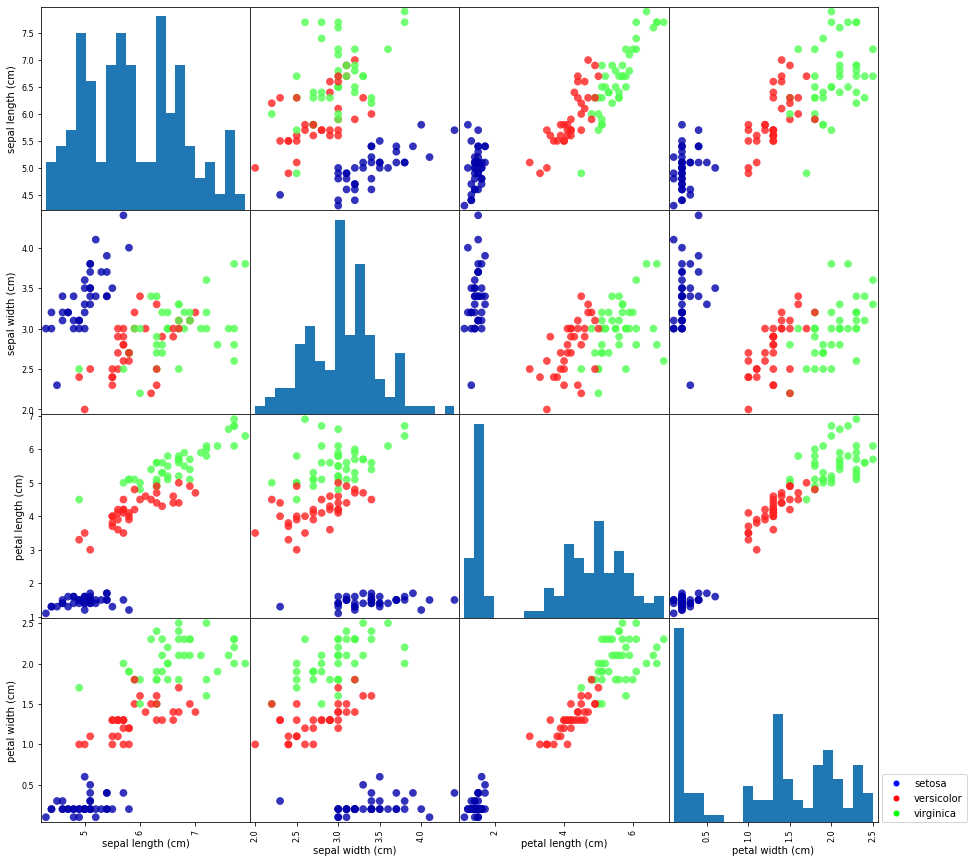

In [16]:
"""
먼저 할 일:
머신러닝 모델을 만들기 전 데이터를 살펴봅니다.
비정상적인 값이나 특이한 값이 있는 지 살펴봅니다.
-산점도로 시각화하는 방법은 좋은 방법 중 하나입니다.
"""

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset().feature_names)
pd.plotting.scatter_matrix(
    iris_dataframe, c=y_train, figsize=(15,15),
    marker='o',hist_kwds={'bins' :20}, s=60, alpha=.8, cmap=mglearn.cm3)
handles = [plt.plot([],[],color=plt.cm.brg(i/2), ls="", marker=".", \
                    markersize=10)[0] for i in range(3)] 
labels=["setosa", "versicolor", "virginica"]
plt.legend(handles, labels,loc=(1.02,0))
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# 이웃의 갯수 = 1
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
#knn 객체 반환
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
#새로운 iris 설정
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new

array([[5. , 2.9, 1. , 0.2]])

In [20]:
#새로운 iris 데이터를 기존 데이터와 비교해 품종 예측
prediction = knn.predict(X_new)
prediction

array([0])

In [21]:
#new 데이터의 품종 이름 출력
iris_dataset()['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [22]:
#test set에 대한 예측값
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [23]:
#테스트set의 정확도
np.mean(y_pred == y_test)

0.9736842105263158

In [24]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset()['data'], iris_dataset()['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.9736842105263158